In [1]:
# Array manipulation
import numpy as np

# Data visualization
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# XOR Data

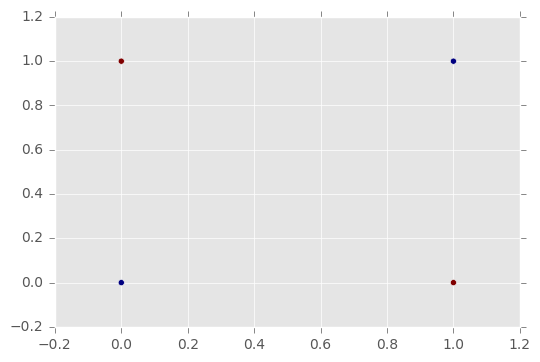

In [2]:
# Make XOR data
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

T = np.array([0, 1, 1, 0])

plt.scatter(X[:, 0], X[:, 1], c = T)

In [3]:
# Create a third feature
z = np.array([X[:, 0] * X[:, 1]])
z = z.reshape(X.shape[0], -1)

# Add bias to the input, so we can use bias as a weight
bias_ones = np.ones([X.shape[0], 1])

# Add all new features to input
Xb = np.concatenate((bias_ones, z, X), axis = 1)

In [4]:
def visualize(W):
    x = np.arange(-0.2, 1.3, 0.01)
    y = np.arange(-0.2, 1.3, 0.01)
    xx, yy = np.meshgrid(x, y)
    pred_area = np.c_[xx.ravel(), yy.ravel()]

    # Vector of ones for bias
    ones = np.ones([np.product(xx.shape), 1])
    # Calculate product
    prod = np.array([pred_area[:, 0] * pred_area[:, 1]])
    prod = prod.reshape(pred_area.shape[0], -1)

    pred_area = np.concatenate((ones, prod, pred_area), axis = 1)

    pred = np.round(sigmoid(pred_area.dot(W)))

    pred = pred.reshape(xx.shape)

    # Plot decision boundaries
    plt.pcolormesh(xx, yy, pred, cmap = 'seismic')

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c = T)

    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.show()
    
    return

# Logistic regression

In [5]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [6]:
def cross_entropy(T, Y):
    # If T = 0, fake_label = 1 - Y ; if T = 1, fake_label = Y
    fake_label = Y.copy()
    fake_label[T == 0] = 1 - fake_label[T == 0]    
  
    return -np.sum(np.log(fake_label))  

In [7]:
# Initialize random weights
W = np.random.randn(Xb.shape[1])

# Feedfoward
Y = sigmoid(Xb.dot(W))

In [8]:
# Hyperparameters
steps = 1000
learning_rate = 1e-2
regularization_factor = 1e-2

costs = []

Step: 0 || Cross entropy: 3.2406164634292045


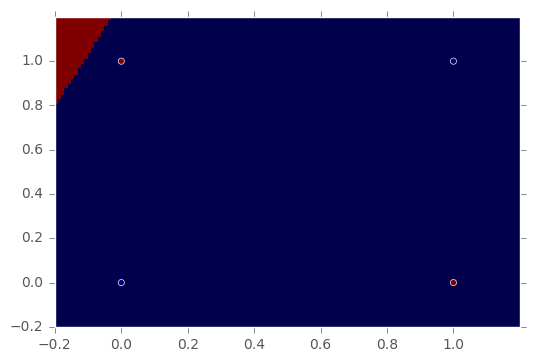

Step: 50 || Cross entropy: 2.829672469381068


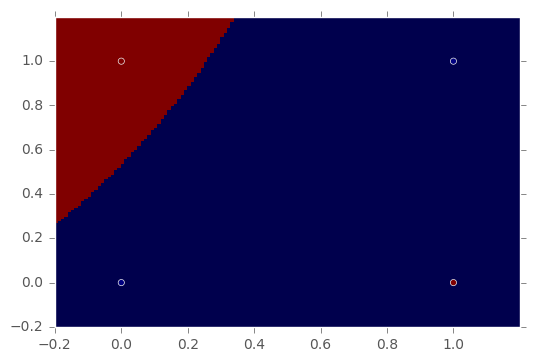

Step: 100 || Cross entropy: 2.6434616209888864


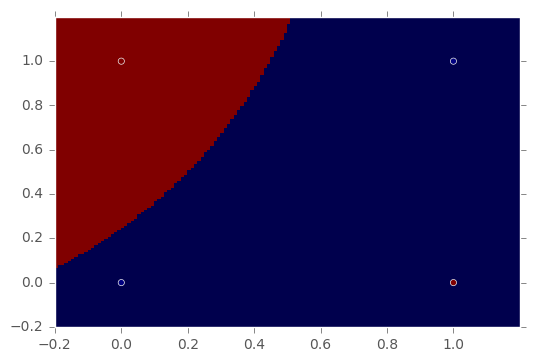

Step: 150 || Cross entropy: 2.5226450640605824


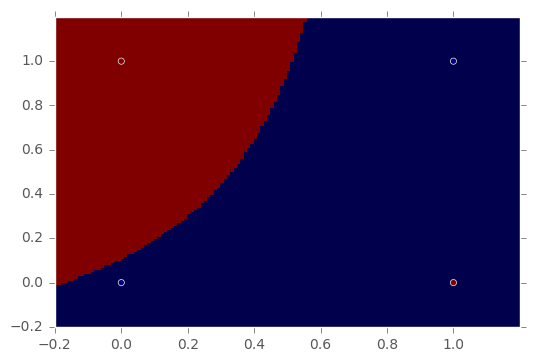

Step: 200 || Cross entropy: 2.425387248731106


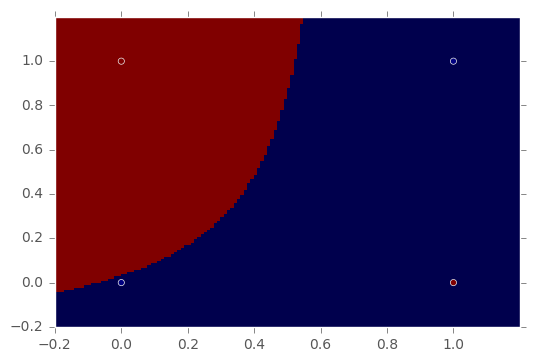

Step: 250 || Cross entropy: 2.340985684818952


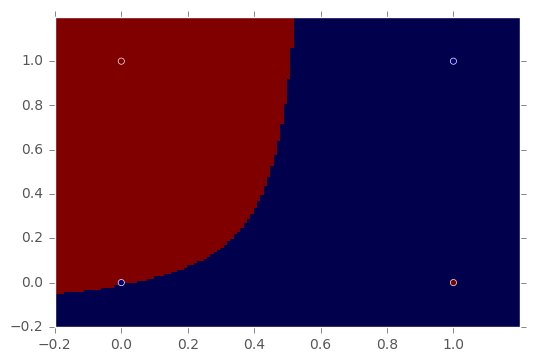

Step: 300 || Cross entropy: 2.2657810036884207


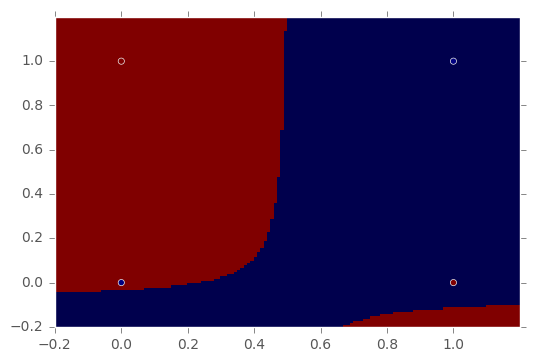

Step: 350 || Cross entropy: 2.1978451680230737


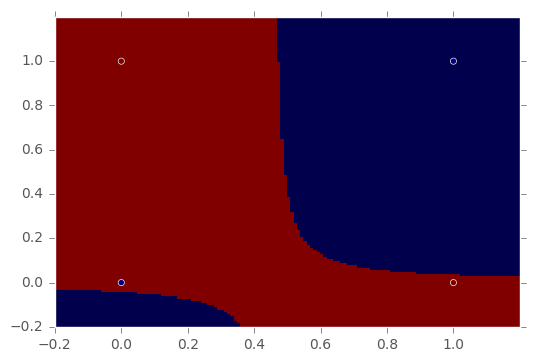

Step: 400 || Cross entropy: 2.1358468524953125


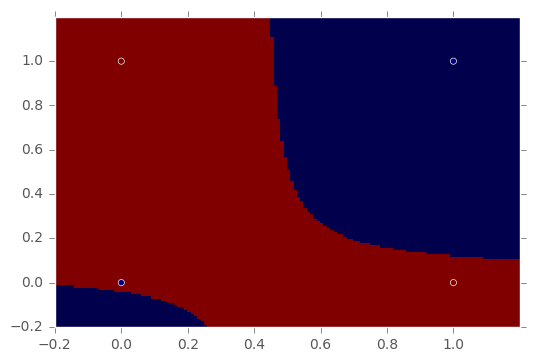

Step: 450 || Cross entropy: 2.0787748563906927


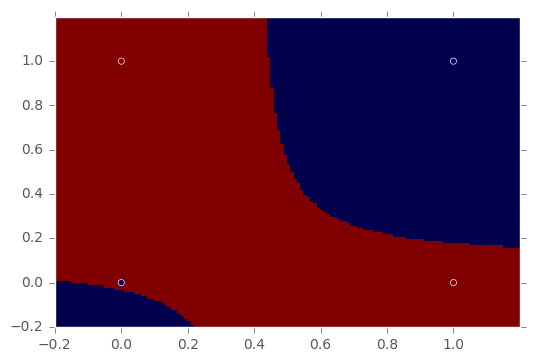

Step: 500 || Cross entropy: 2.0258402775918496


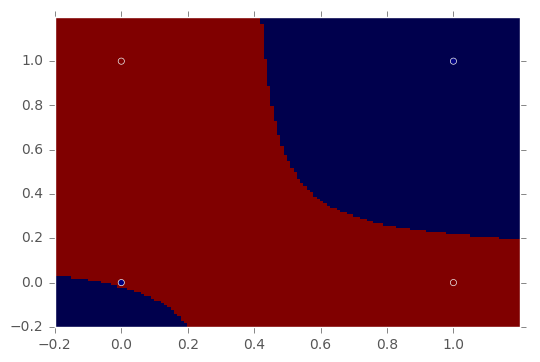

Step: 550 || Cross entropy: 1.9764222188401328


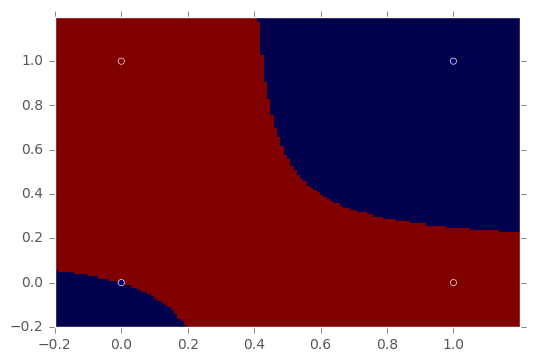

Step: 600 || Cross entropy: 1.93002931931938


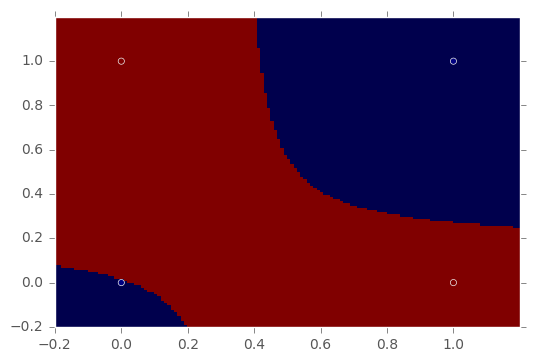

Step: 650 || Cross entropy: 1.8862704268160866


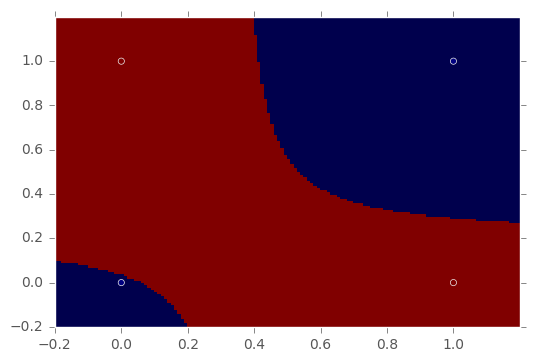

Step: 700 || Cross entropy: 1.8448319343502504


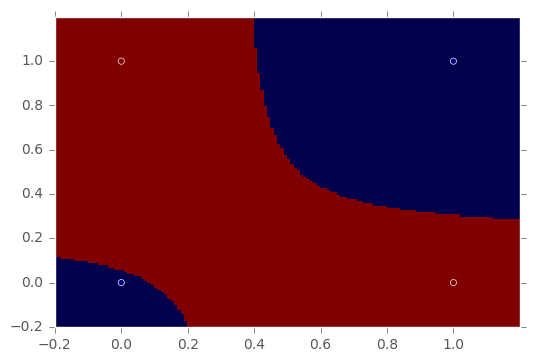

Step: 750 || Cross entropy: 1.8054602832628792


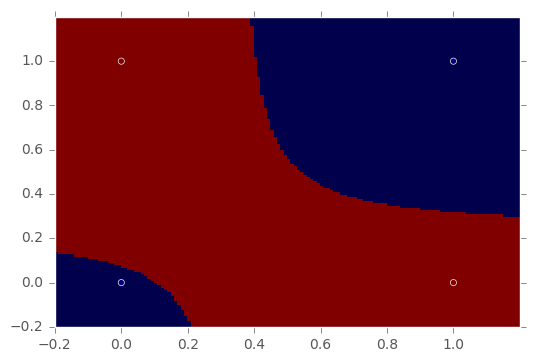

Step: 800 || Cross entropy: 1.7679484958806986


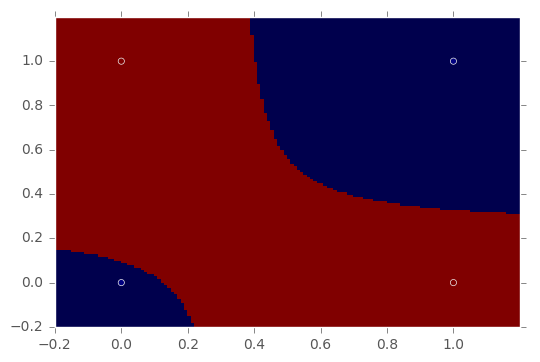

Step: 850 || Cross entropy: 1.7321258333474534


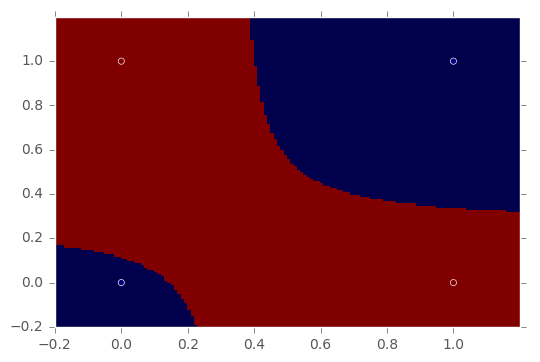

Step: 900 || Cross entropy: 1.697849862004304


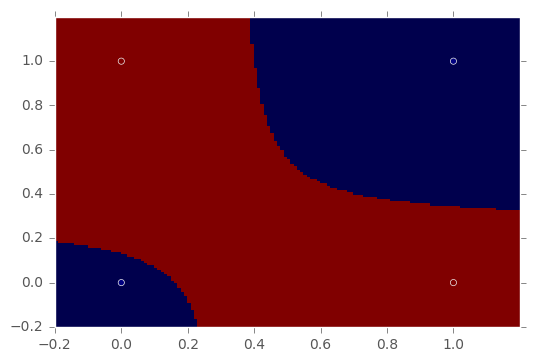

Step: 950 || Cross entropy: 1.6650003673093292


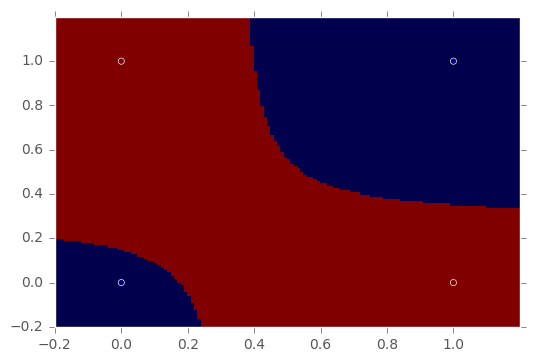

Final weights: [-0.15609922 -2.94699347  0.85105992  0.98401833]


In [9]:
# Train the model
for step in range(steps):
    # Calculate cross entropy cost
    cost = cross_entropy(T, Y)
    costs.append(cost)
    
    # Plot weights
    if step % 50 == 0:
        print('Step: {0} || Cross entropy: {1}'.format(step, cost))
        visualize(W)
      
    # Perform gradient descent
    W -= learning_rate * ( (Y-T).dot(Xb) + regularization_factor * W )
    # Calculate new output
    Y = sigmoid(Xb.dot(W))
    
print('Final weights:', W)

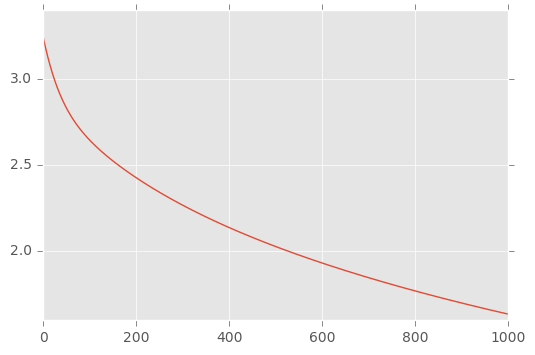

In [10]:
# Plot cross entropy
plt.plot(costs)